# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: John Hickman 

### Git Hub Link: https://github.com/Gretsch1963/44620-Mod-6/tree/master

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [54]:

from bs4 import BeautifulSoup

from contextlib import redirect_stdout

from spacytextblob.spacytextblob import SpacyTextBlob

from spacy.lang.en.stop_words import STOP_WORDS

import requests

import pickle

import io

import re

import spacy

from collections import Counter

import matplotlib.pyplot as plt

import numpy as np

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    article = soup.find("article")

    if article:
        with open("article.pkl", "wb") as file:
            pickle.dump(str(article), file)
            print("Article saved to a file")
    else:
        print("Article not found")
else:
    print("Webpage Error")

Article saved to a file


## Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [56]:
import pickle
from bs4 import BeautifulSoup

# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# removing empty lines for redability purposes
text_without_empty_lines = "\n".join(line for line in text.split("\n") if line.strip())

print(text_without_empty_lines)

How Laser Headlights Work
                130 Comments            
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific

## Question 3 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [57]:
import pickle
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

def preprocess_text(text):
    
    nlp = spacy.load("en_core_web_sm")
    
    
    doc = nlp(text)

    
    tokens = [token.text.lower() for token in doc if token.text.lower() not in STOP_WORDS and token.text.lower() not in string.punctuation and not token.is_space]
    
    return tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            
            tokens = preprocess_text(article_text)

            
            most_common_tokens = Counter(tokens).most_common(5)

            print("Five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency} occurrences")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

Five most frequent tokens:
laser: 35 occurrences
headlights: 19 occurrences
headlight: 11 occurrences
technology: 10 occurrences
led: 10 occurrences


## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [58]:
import pickle
import spacy
from collections import Counter
import string

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):

    doc = nlp(text)

    filtered_tokens = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    return filtered_tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            lemmas = preprocess_text(article_text)

            lemma_frequencies = Counter(lemmas)

            most_common_lemmas = lemma_frequencies.most_common(5)

            print("Top 5 most frequent lemmas:")
            for lemma, frequency in most_common_lemmas:
                print(f"'{lemma}': {frequency}")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

Top 5 most frequent lemmas:
'laser': 40
'headlight': 28
'beam': 12
'technology': 10
'light': 10


## Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [59]:
import re

def score_sentence_by_token(sentence, interesting_tokens): 
   
    sentence_length = len(sentence.split())
    interesting_token = [token[0] for token in interesting_tokens]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().split():
        if _ in interesting_token:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No tokens found'
    


In [60]:

# testing the first sentence 
sentence = '''When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'''

In [61]:
score_sentence_by_token(sentence.lower(),most_common_tokens)

0.1

In [64]:


def score_sentence_by_lemma(sentence, interesting_lemmas):
    
    sentence_length = len(sentence.split())
    interesting_lemmas = [lemma[0] for lemma in interesting_lemmas]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().strip().split():
        if _ in interesting_lemmas:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No lemmas found'
    
score_sentence_by_lemma(sentence, most_common_lemmas)

0.05

## Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

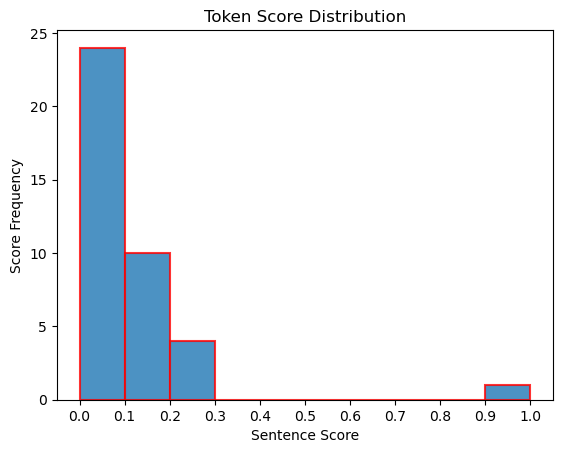

In [70]:
# Clean up the article for processing 

start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]

# Processing 
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
tokens_hist_values = [score_sentence_by_token(sentence, most_common_tokens) for sentence in sentences if score_sentence_by_token(sentence, most_common_tokens) != 'No tokens found']

# Graph

plt.hist(tokens_hist_values, bins=10, range=(0, 1),edgecolor='red', linewidth=1.5,alpha=0.8)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Sentence Score')
plt.ylabel('Score Frequency')
plt.title('Token Score Distribution')

plt.show();

## Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

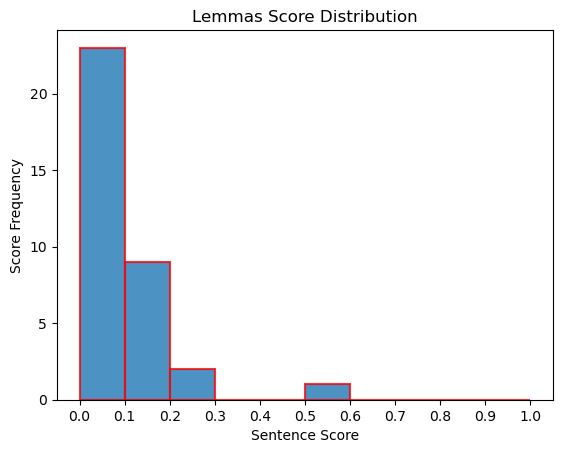

In [74]:
start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
lemmas_hist_values = [score_sentence_by_lemma(sentence, most_common_lemmas) for sentence in sentences if score_sentence_by_lemma(sentence, most_common_lemmas) != 'No lemmas found']
plt.hist(lemmas_hist_values, bins=10, range=(0, 1),edgecolor='red', linewidth=1.5,alpha=0.8)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Sentence Score')
plt.ylabel('Score Frequency')
plt.title('Lemmas Score Distribution')

plt.show();

## Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [73]:
nlp = spacy.load("en_core_web_sm")

#code to single out nouns for lemmas

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]
    return filtered_tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            lemmas = preprocess_text(article_text)

            lemma_frequencies = Counter(lemmas)

            most_common_lemmas = lemma_frequencies.most_common(5)

            print("Top 5 most frequent nouns (lemmas):")
            for lemma, frequency in most_common_lemmas:
                print(f"'{lemma}': {frequency}")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

#code to single out nouns for tokens       
        
        
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN" and token.text.lower() not in STOP_WORDS and token.text.lower() not in string.punctuation and not token.is_space]
    return tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            tokens = preprocess_text(article_text)

            most_common_tokens = Counter(tokens).most_common(5)

            print("Five most frequent nouns:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency} occurrences")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

Top 5 most frequent nouns (lemmas):
'laser': 35
'headlight': 22
'beam': 12
'technology': 10
'led': 6
Five most frequent nouns:
laser: 30 occurrences
headlights: 17 occurrences
technology: 10 occurrences
beam: 7 occurrences
leds: 6 occurrences
